# Exploratory Data Analysis - Credit Card Fraud Dataset

This notebook performs comprehensive exploratory data analysis on the credit card fraud dataset including:
- Data cleaning and preprocessing
- Univariate analysis (distributions)
- Bivariate analysis (feature-target relationships)
- Class distribution analysis
- Handling class imbalance

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 2. Load Data

In [2]:
# Load the credit card dataset
creditcard_data = pd.read_csv('../data/raw/creditcard.csv')

print('='*60)
print('CREDIT CARD DATASET OVERVIEW')
print('='*60)
print(f'Dataset Shape: {creditcard_data.shape}')
print(f'Total Records: {creditcard_data.shape[0]:,}')
print(f'Total Features: {creditcard_data.shape[1]}')
print(f'\nColumn Names: {list(creditcard_data.columns)}')

CREDIT CARD DATASET OVERVIEW
Dataset Shape: (284807, 31)
Total Records: 284,807
Total Features: 31

Column Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [3]:
# Display first few rows
print('\n=== First 5 Rows ===')
creditcard_data.head()


=== First 5 Rows ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display last few rows
print('\n=== Last 5 Rows ===')
creditcard_data.tail()


=== Last 5 Rows ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Dataset info
print('\n=== Dataset Information ===')
creditcard_data.info()


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

## 3. Data Cleaning

### 3.1 Check for Missing Values

In [6]:
print('='*60)
print('MISSING VALUES ANALYSIS')
print('='*60)
missing_values = creditcard_data.isnull().sum()
missing_percent = (missing_values / len(creditcard_data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print('✓ No missing values found in the dataset!')

print(f'\nTotal missing values: {missing_values.sum()}')

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!

Total missing values: 0


### 3.2 Check for Duplicates

In [7]:
print('='*60)
print('DUPLICATE RECORDS ANALYSIS')
print('='*60)
duplicates = creditcard_data.duplicated().sum()
print(f'Number of duplicate records: {duplicates}')
print(f'Percentage of duplicates: {(duplicates / len(creditcard_data)) * 100:.4f}%')

if duplicates > 0:
    print(f'\n⚠ Found {duplicates} duplicate records')
    # Optionally remove duplicates
    # creditcard_data = creditcard_data.drop_duplicates()
else:
    print('\n✓ No duplicate records found!')

DUPLICATE RECORDS ANALYSIS
Number of duplicate records: 1081
Percentage of duplicates: 0.3796%

⚠ Found 1081 duplicate records


### 3.3 Data Types

In [8]:
print('='*60)
print('DATA TYPES')
print('='*60)
print(creditcard_data.dtypes)

print('\n=== Data Type Summary ===')
print(f'Numerical features: {len(creditcard_data.select_dtypes(include=[np.number]).columns)}')
print(f'Categorical features: {len(creditcard_data.select_dtypes(include=["object"]).columns)}')

DATA TYPES
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

=== Data Type Summary ===
Numerical features: 31
Categorical features: 0


### 3.4 Basic Statistics

In [9]:
print('='*60)
print('DESCRIPTIVE STATISTICS')
print('='*60)
creditcard_data.describe()

DESCRIPTIVE STATISTICS


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Extended statistics
print('\n=== Extended Statistics ===')
print(creditcard_data.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))


=== Extended Statistics ===
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
1%       2422.000000 -6.563199e+00 -4.960300e+00 -3.978377e+00 -3.122987e+00   
5%      25297.600000 -2.899147e+00 -1.971975e+00 -2.389740e+00 -2.195683e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
95%    164143.400000  2.081223e+00  1.808585e+00  2.062635e+00  2.566501e+00   
99%    170560.940000  2.237130e+00  3.801811e+00  2.728434e+00  4.248032e+00   
max    1727

## 4. Class Distribution Analysis

In [11]:
print('='*60)
print('CLASS DISTRIBUTION ANALYSIS')
print('='*60)

# Class distribution
class_dist = creditcard_data['Class'].value_counts().sort_index()
print('\nClass Counts:')
print(class_dist)

print('\nClass Proportions:')
class_prop = creditcard_data['Class'].value_counts(normalize=True).sort_index()
print(class_prop)

# Calculate imbalance ratio
imbalance_ratio = class_dist[0] / class_dist[1]
print(f'\nImbalance Ratio: {imbalance_ratio:.2f}:1')
print(f'Fraud percentage: {class_prop[1] * 100:.4f}%')

CLASS DISTRIBUTION ANALYSIS

Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class Proportions:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Imbalance Ratio: 577.88:1
Fraud percentage: 0.1727%


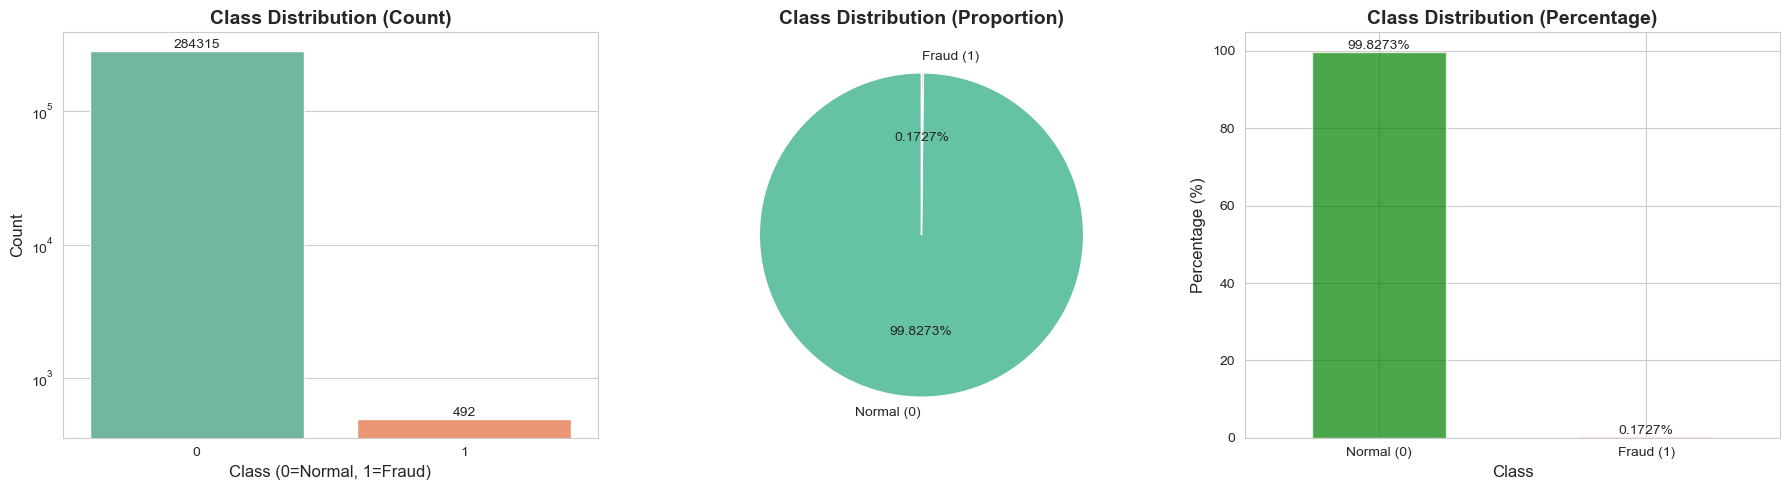

In [12]:
# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
sns.countplot(data=creditcard_data, x='Class', ax=axes[0], palette='Set2')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_yscale('log')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
class_dist.plot(kind='pie', ax=axes[1], autopct='%1.4f%%', 
                labels=['Normal (0)', 'Fraud (1)'], colors=['#66c2a5', '#fc8d62'],
                startangle=90)
axes[1].set_title('Class Distribution (Proportion)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

# Bar plot with percentages
class_prop_pct = class_prop * 100
class_prop_pct.plot(kind='bar', ax=axes[2], color=['green', 'red'], alpha=0.7)
axes[2].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].set_xticklabels(['Normal (0)', 'Fraud (1)'], rotation=0)
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.4f%%')

plt.tight_layout()
plt.show()

## 5. Univariate Analysis - Distributions

### 5.1 Time Feature Distribution

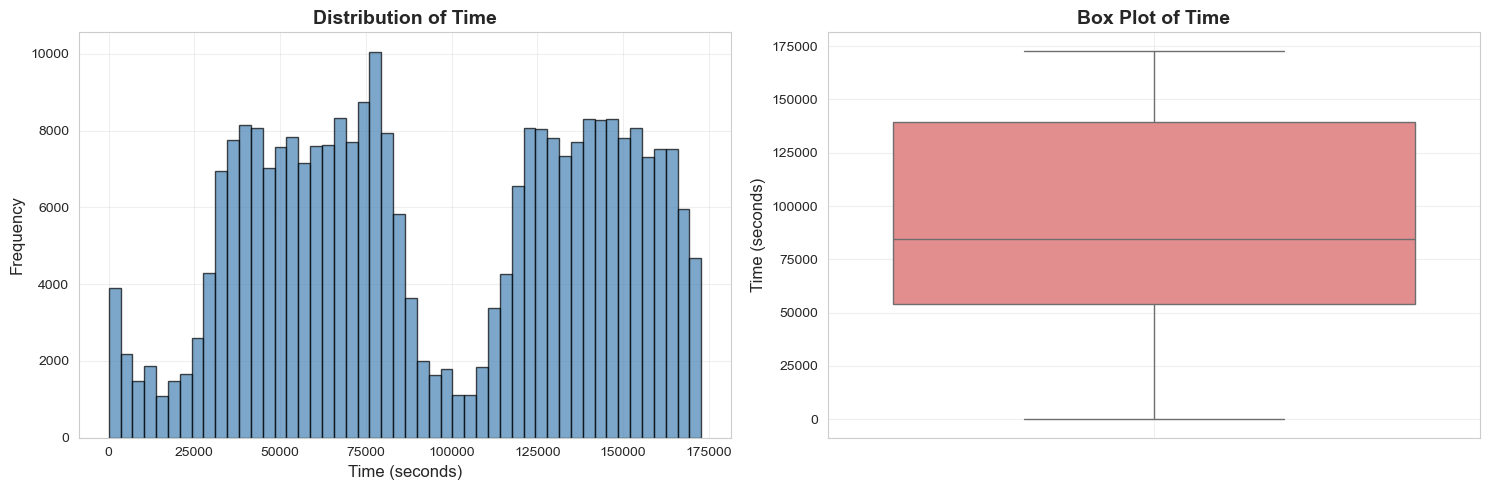

Time statistics:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [13]:
# Analyze Time feature
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(creditcard_data['Time'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(alpha=0.3)

# Box plot
sns.boxplot(data=creditcard_data, y='Time', ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Time (seconds)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Time statistics:')
print(creditcard_data['Time'].describe())

### 5.2 Amount Feature Distribution

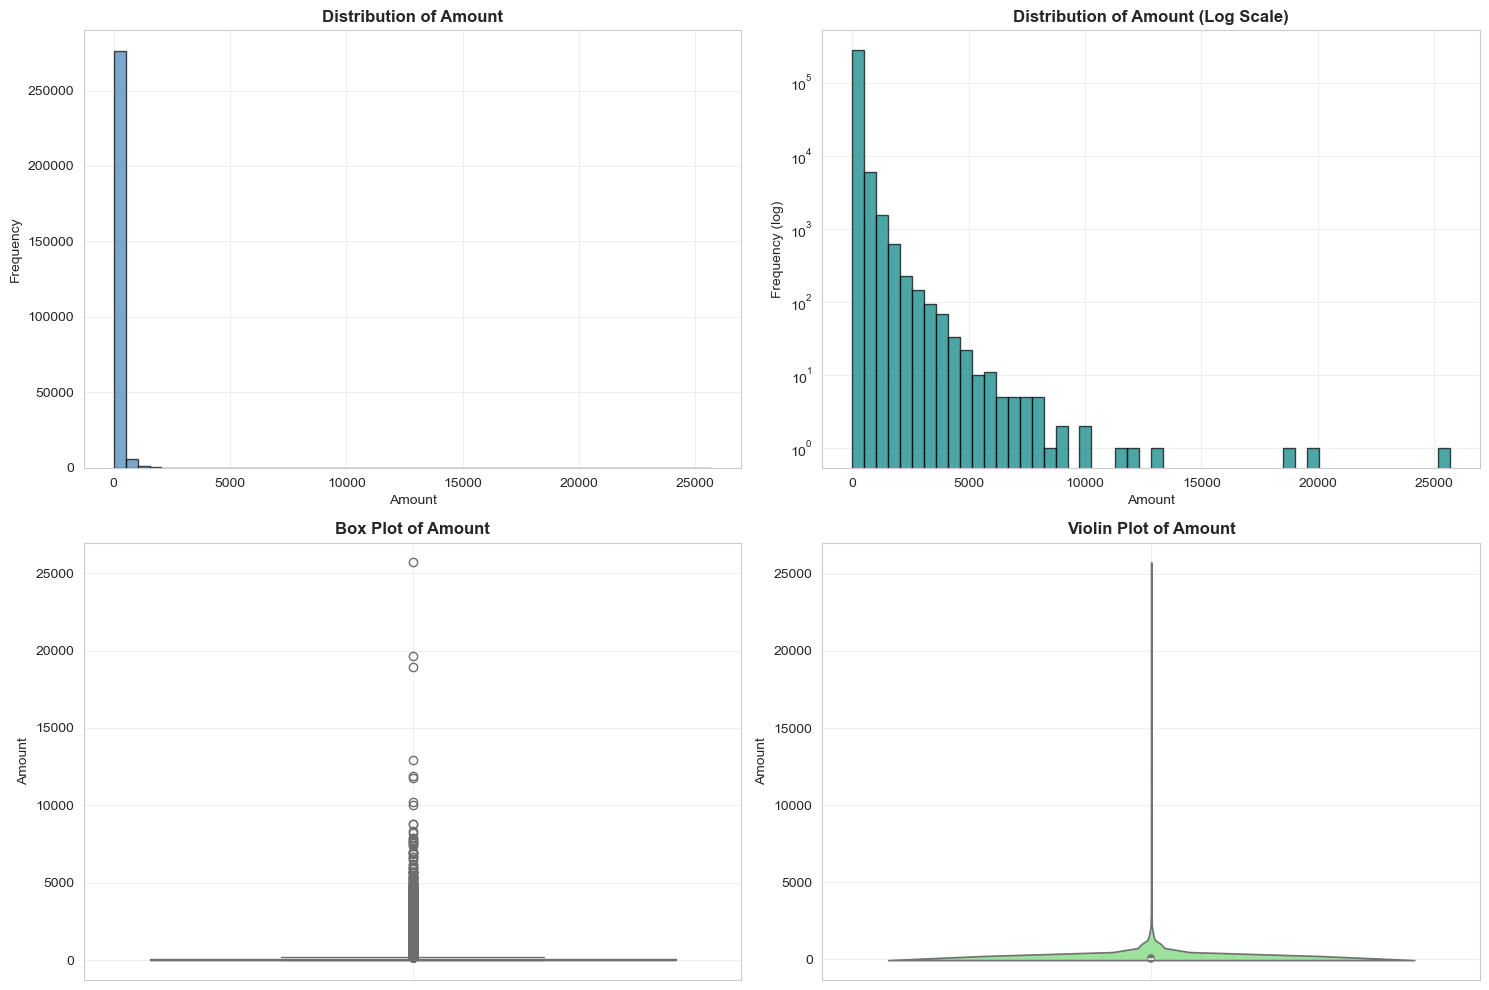

Amount statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [14]:
# Analyze Amount feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(creditcard_data['Amount'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Amount', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Log-scale histogram
axes[0, 1].hist(creditcard_data['Amount'], bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Distribution of Amount (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount', fontsize=10)
axes[0, 1].set_ylabel('Frequency (log)', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Box plot
sns.boxplot(data=creditcard_data, y='Amount', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Box Plot of Amount', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Amount', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Violin plot
sns.violinplot(data=creditcard_data, y='Amount', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Violin Plot of Amount', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Amount', fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Amount statistics:')
print(creditcard_data['Amount'].describe())

### 5.3 PCA Features Distribution (V1-V28)

In [15]:
# Get V features
v_features = [col for col in creditcard_data.columns if col.startswith('V')]
print(f'Number of PCA features: {len(v_features)}')
print(f'Features: {v_features}')

Number of PCA features: 28
Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


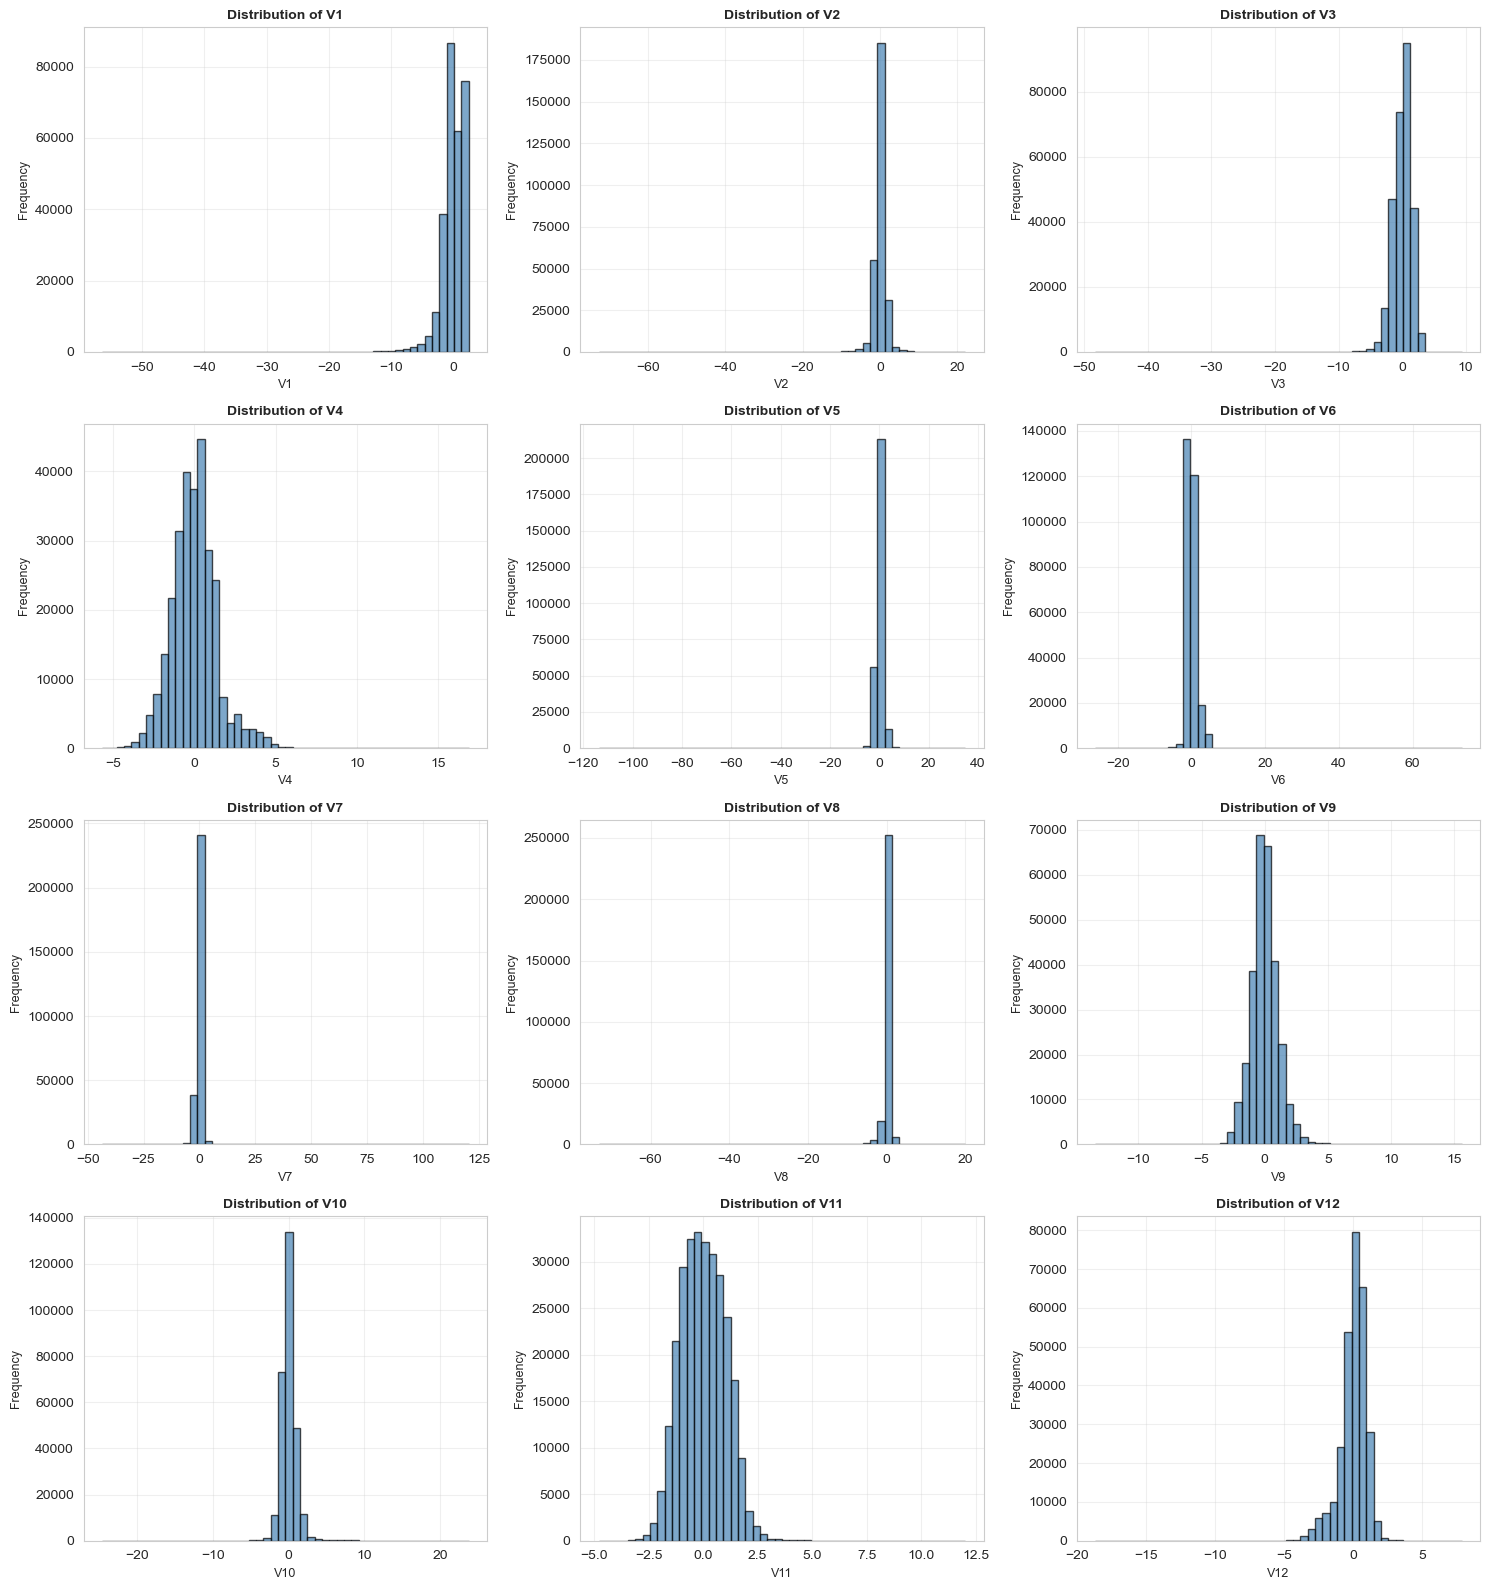

In [16]:
# Distribution plots for V features (first 12)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, col in enumerate(v_features[:12]):
    ax = axes[idx]
    
    # Histogram with KDE
    creditcard_data[col].hist(bins=50, ax=ax, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

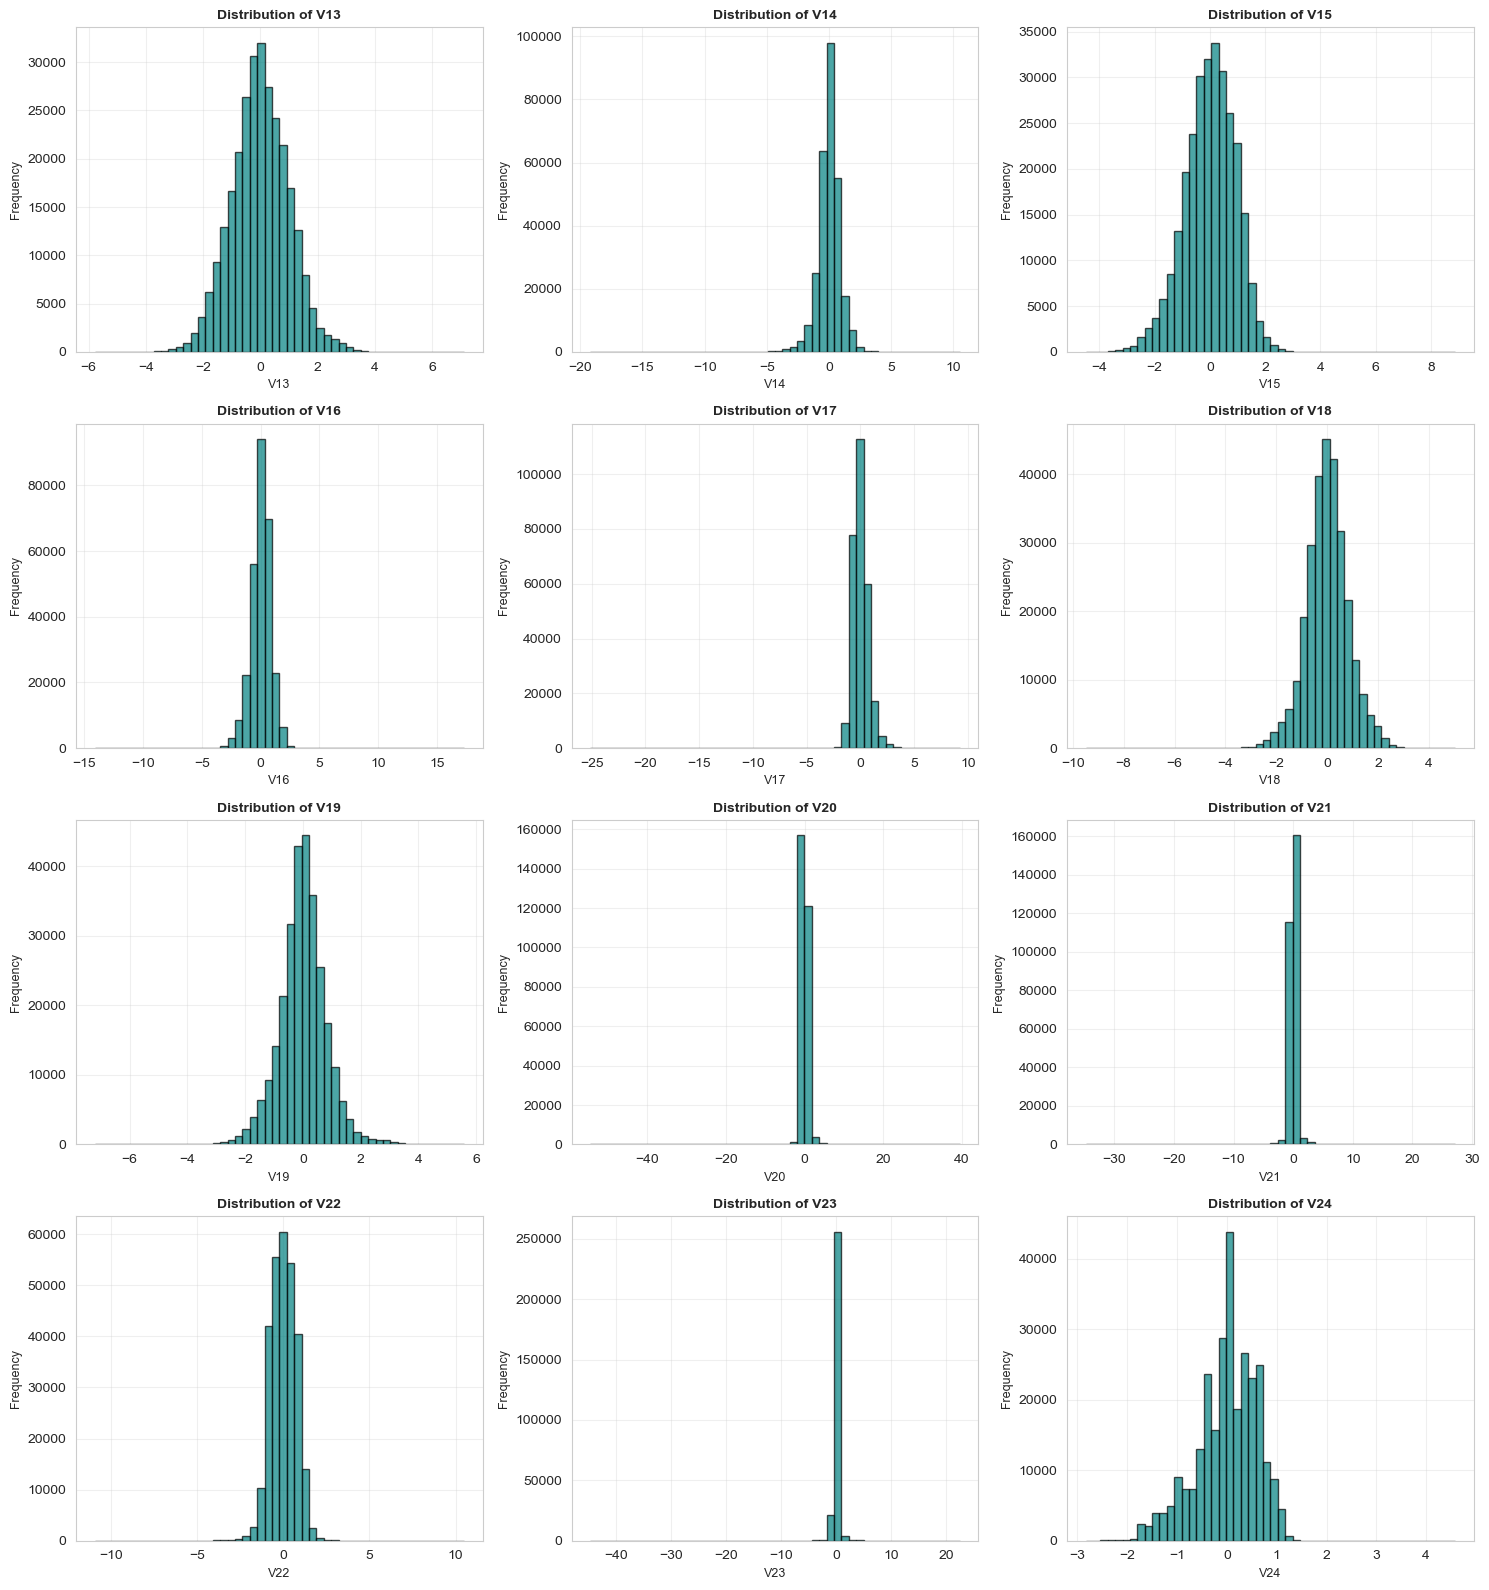

In [17]:
# Distribution plots for V features (next 12)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, col in enumerate(v_features[12:24]):
    ax = axes[idx]
    
    # Histogram
    creditcard_data[col].hist(bins=50, ax=ax, alpha=0.7, color='teal', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

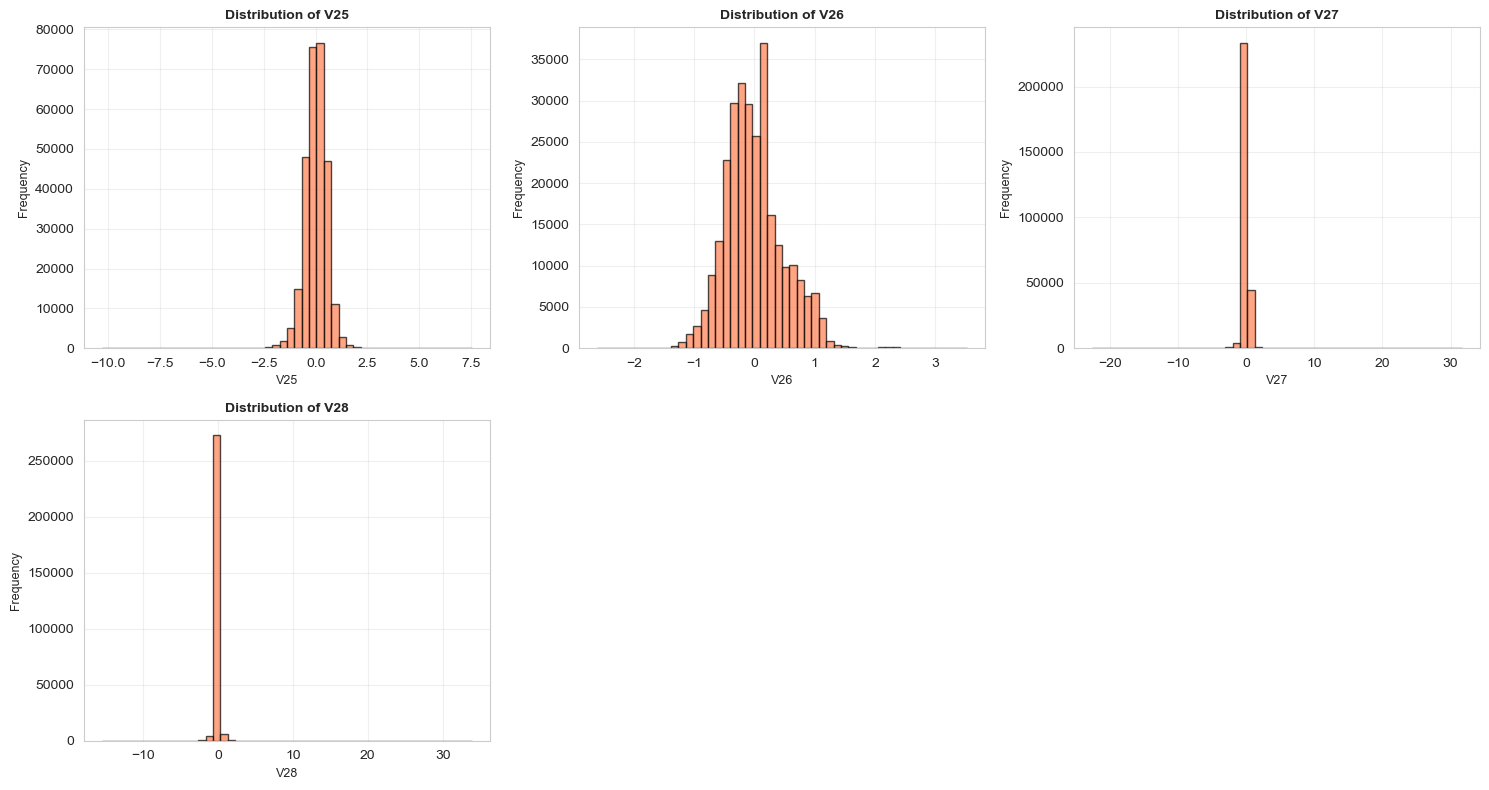

In [18]:
# Distribution plots for remaining V features
remaining_v = v_features[24:]
if len(remaining_v) > 0:
    n_remaining = len(remaining_v)
    n_cols = 3
    n_rows = (n_remaining + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_remaining > 1 else [axes]
    
    for idx, col in enumerate(remaining_v):
        ax = axes[idx]
        
        # Histogram
        creditcard_data[col].hist(bins=50, ax=ax, alpha=0.7, color='coral', edgecolor='black')
        ax.set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        ax.set_xlabel(col, fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_remaining, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

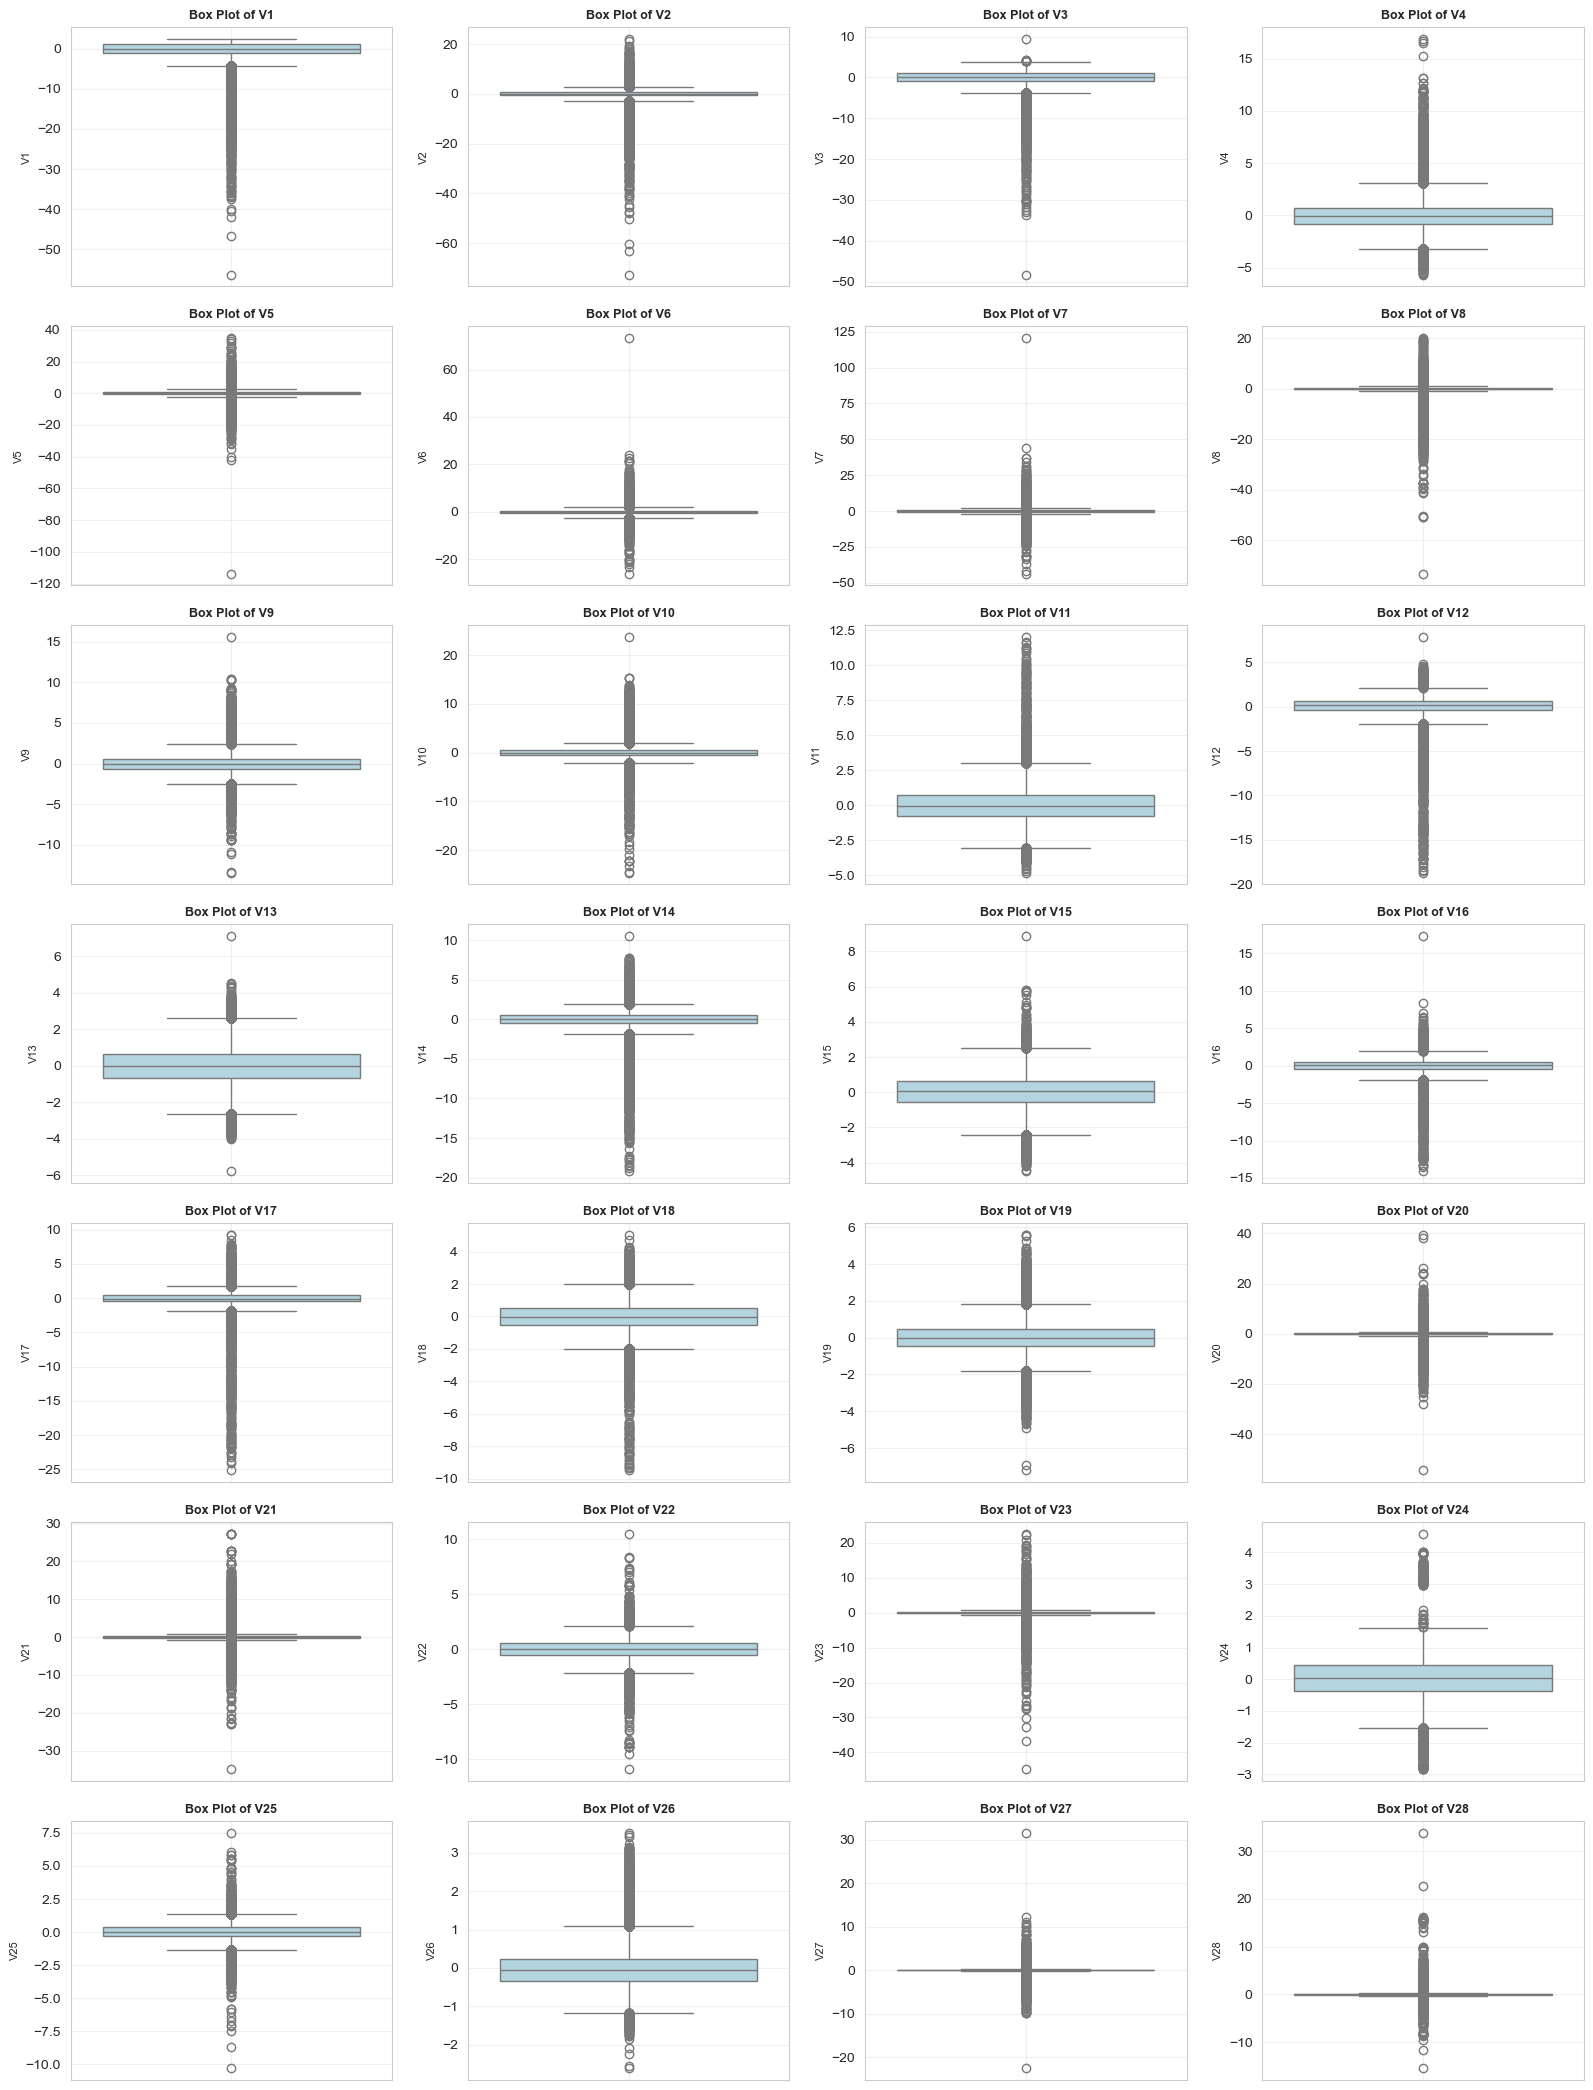

In [19]:
# Box plots for all V features
fig, axes = plt.subplots(7, 4, figsize=(16, 21))
axes = axes.flatten()

for idx, col in enumerate(v_features):
    ax = axes[idx]
    
    # Box plot
    sns.boxplot(data=creditcard_data, y=col, ax=ax, color='lightblue')
    ax.set_title(f'Box Plot of {col}', fontsize=9, fontweight='bold')
    ax.set_ylabel(col, fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Bivariate Analysis - Feature-Target Relationships

### 6.1 Time vs Class

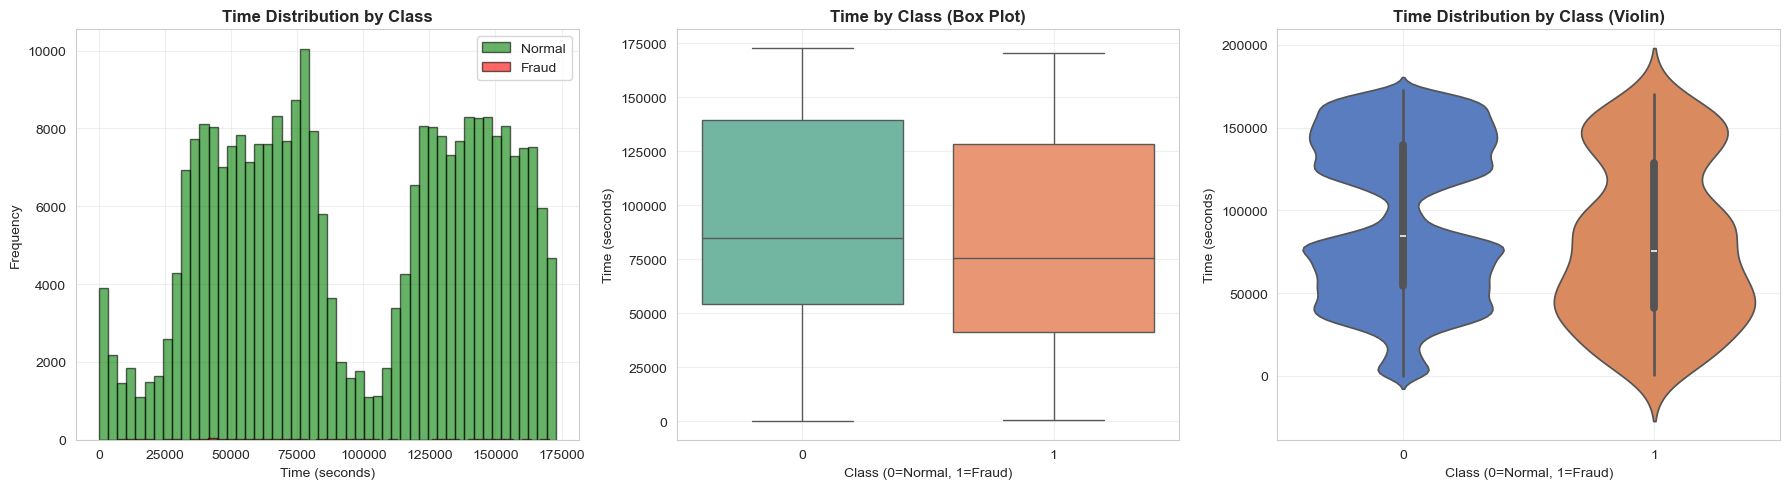

In [20]:
# Time feature by class
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Overlapping histograms
creditcard_data[creditcard_data['Class'] == 0]['Time'].hist(bins=50, ax=axes[0], alpha=0.6, 
                                                              label='Normal', color='green', edgecolor='black')
creditcard_data[creditcard_data['Class'] == 1]['Time'].hist(bins=50, ax=axes[0], alpha=0.6, 
                                                              label='Fraud', color='red', edgecolor='black')
axes[0].set_title('Time Distribution by Class', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
sns.boxplot(data=creditcard_data, x='Class', y='Time', ax=axes[1], palette='Set2')
axes[1].set_title('Time by Class (Box Plot)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=10)
axes[1].set_ylabel('Time (seconds)', fontsize=10)
axes[1].grid(alpha=0.3)

# Violin plot
sns.violinplot(data=creditcard_data, x='Class', y='Time', ax=axes[2], palette='muted')
axes[2].set_title('Time Distribution by Class (Violin)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=10)
axes[2].set_ylabel('Time (seconds)', fontsize=10)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Amount vs Class

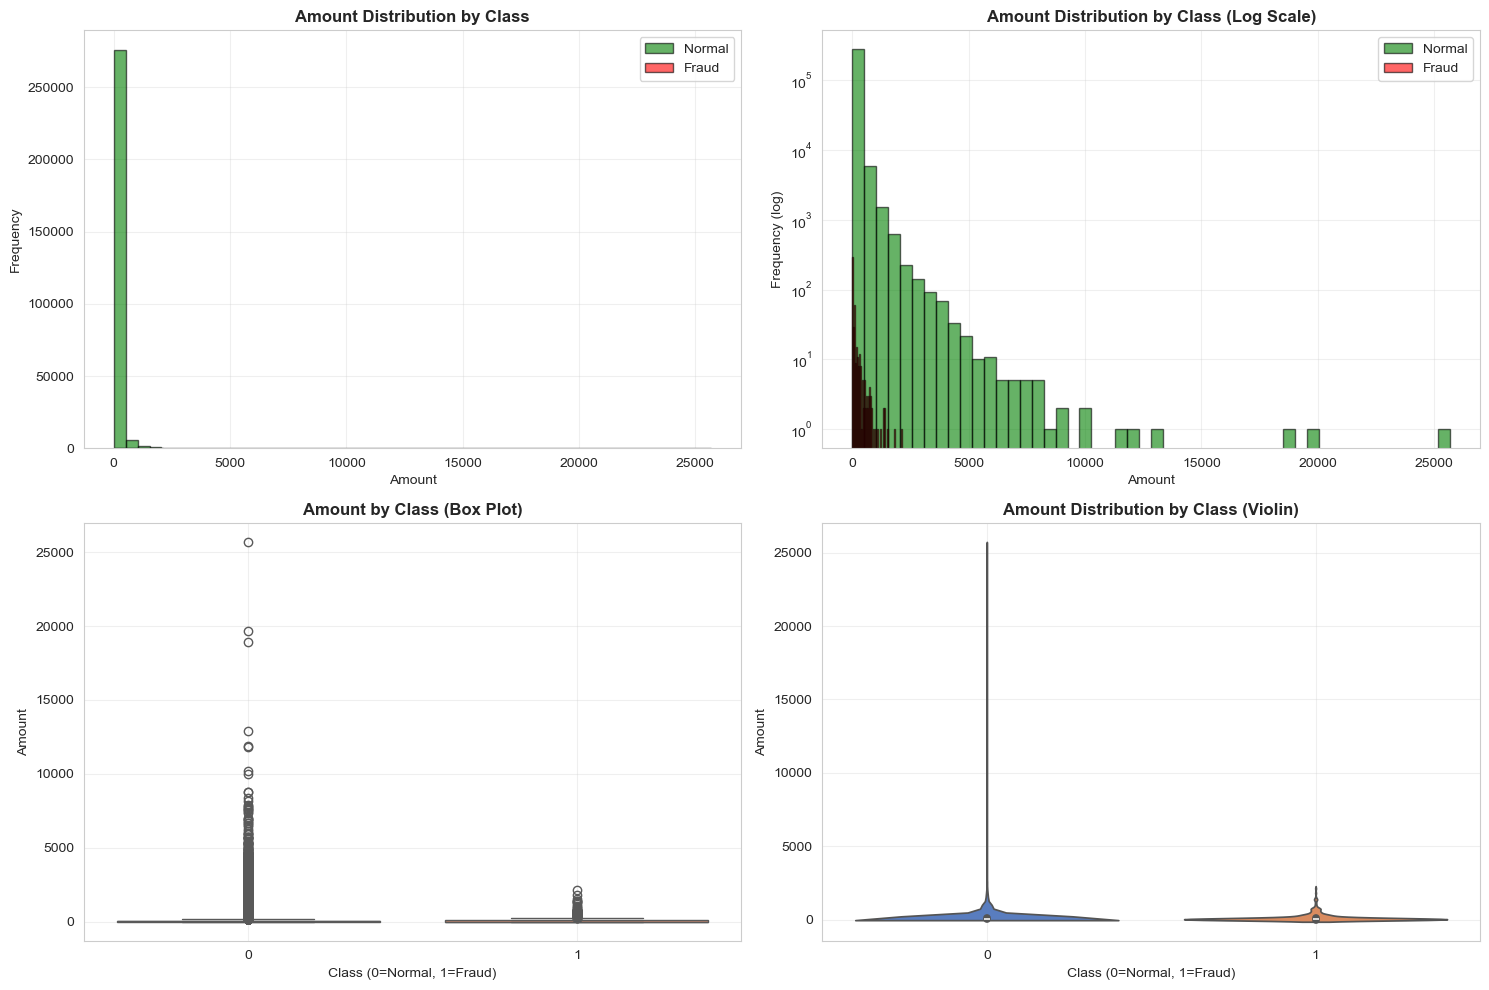


=== Amount Statistics by Class ===

Normal Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [21]:
# Amount feature by class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overlapping histograms
creditcard_data[creditcard_data['Class'] == 0]['Amount'].hist(bins=50, ax=axes[0, 0], alpha=0.6, 
                                                                label='Normal', color='green', edgecolor='black')
creditcard_data[creditcard_data['Class'] == 1]['Amount'].hist(bins=50, ax=axes[0, 0], alpha=0.6, 
                                                                label='Fraud', color='red', edgecolor='black')
axes[0, 0].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Log scale histograms
creditcard_data[creditcard_data['Class'] == 0]['Amount'].hist(bins=50, ax=axes[0, 1], alpha=0.6, 
                                                                label='Normal', color='green', edgecolor='black')
creditcard_data[creditcard_data['Class'] == 1]['Amount'].hist(bins=50, ax=axes[0, 1], alpha=0.6, 
                                                                label='Fraud', color='red', edgecolor='black')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Amount Distribution by Class (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount', fontsize=10)
axes[0, 1].set_ylabel('Frequency (log)', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot
sns.boxplot(data=creditcard_data, x='Class', y='Amount', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Amount by Class (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=10)
axes[1, 0].set_ylabel('Amount', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Violin plot
sns.violinplot(data=creditcard_data, x='Class', y='Amount', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Amount Distribution by Class (Violin)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=10)
axes[1, 1].set_ylabel('Amount', fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics by class
print('\n=== Amount Statistics by Class ===')
print('\nNormal Transactions:')
print(creditcard_data[creditcard_data['Class'] == 0]['Amount'].describe())
print('\nFraud Transactions:')
print(creditcard_data[creditcard_data['Class'] == 1]['Amount'].describe())

### 6.3 PCA Features vs Class (Selected Features)

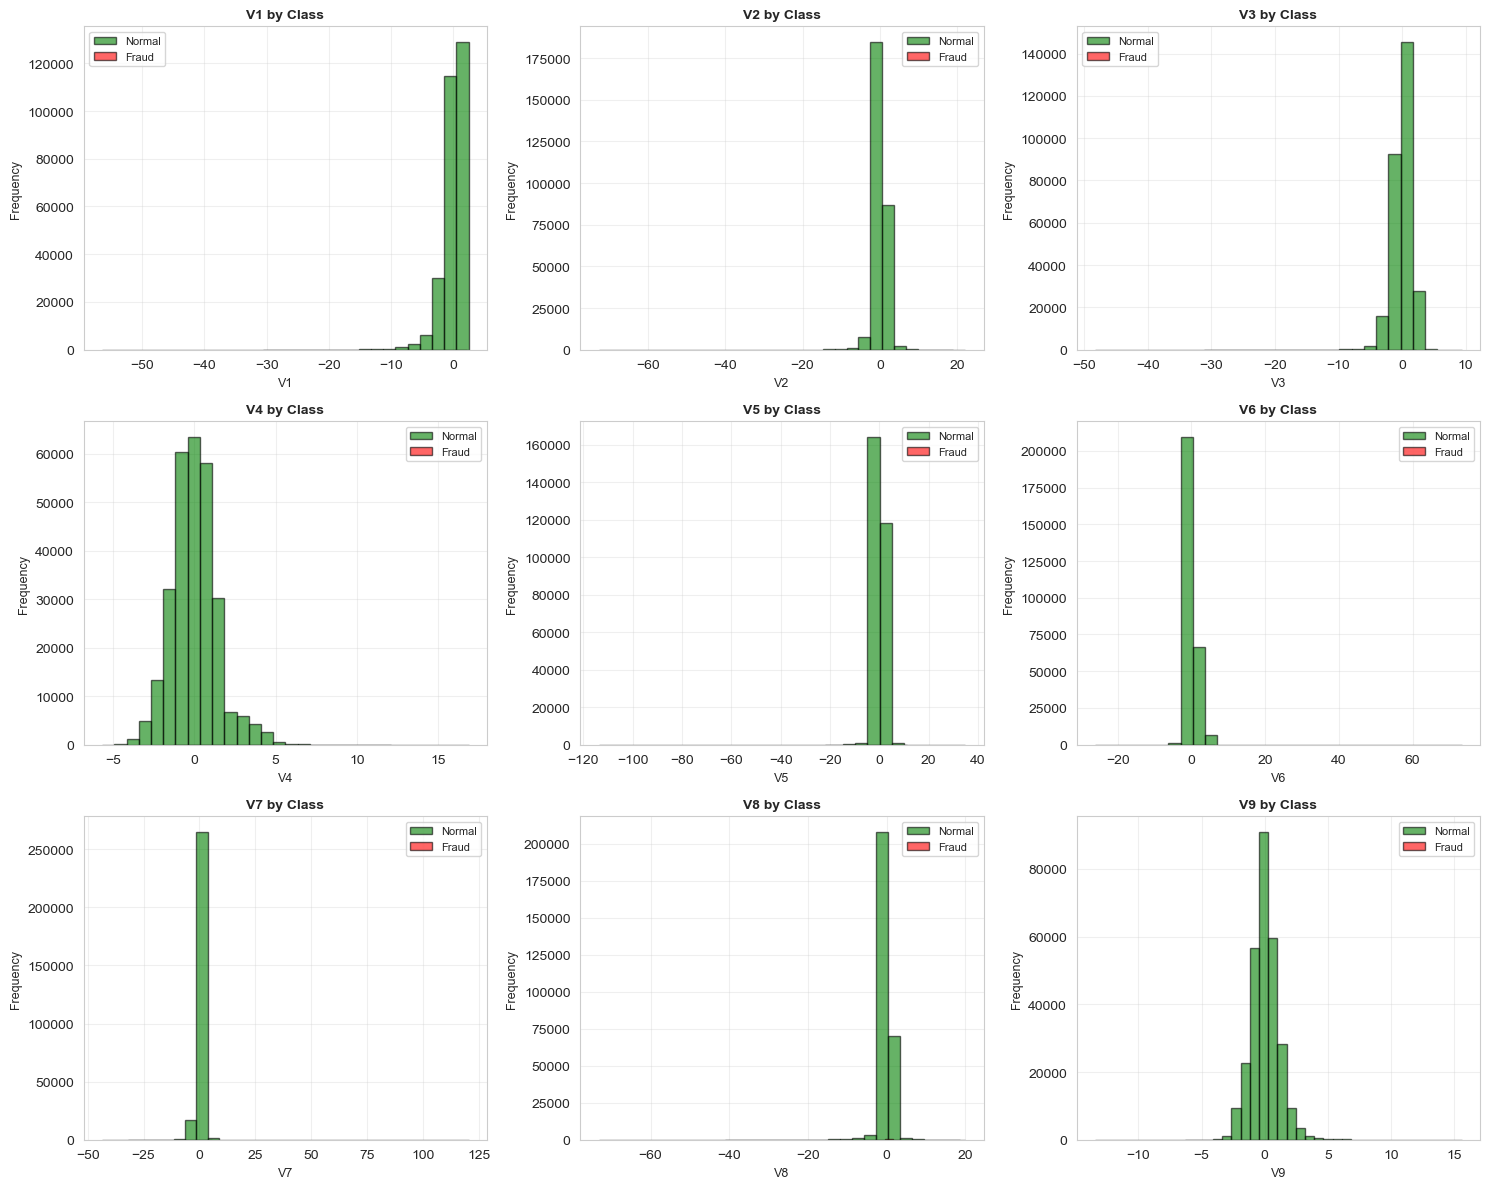

In [22]:
# Analyze first 9 V features by class
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(v_features[:9]):
    ax = axes[idx]
    
    # Overlapping histograms
    creditcard_data[creditcard_data['Class'] == 0][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                               label='Normal', color='green', edgecolor='black')
    creditcard_data[creditcard_data['Class'] == 1][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                               label='Fraud', color='red', edgecolor='black')
    ax.set_title(f'{col} by Class', fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

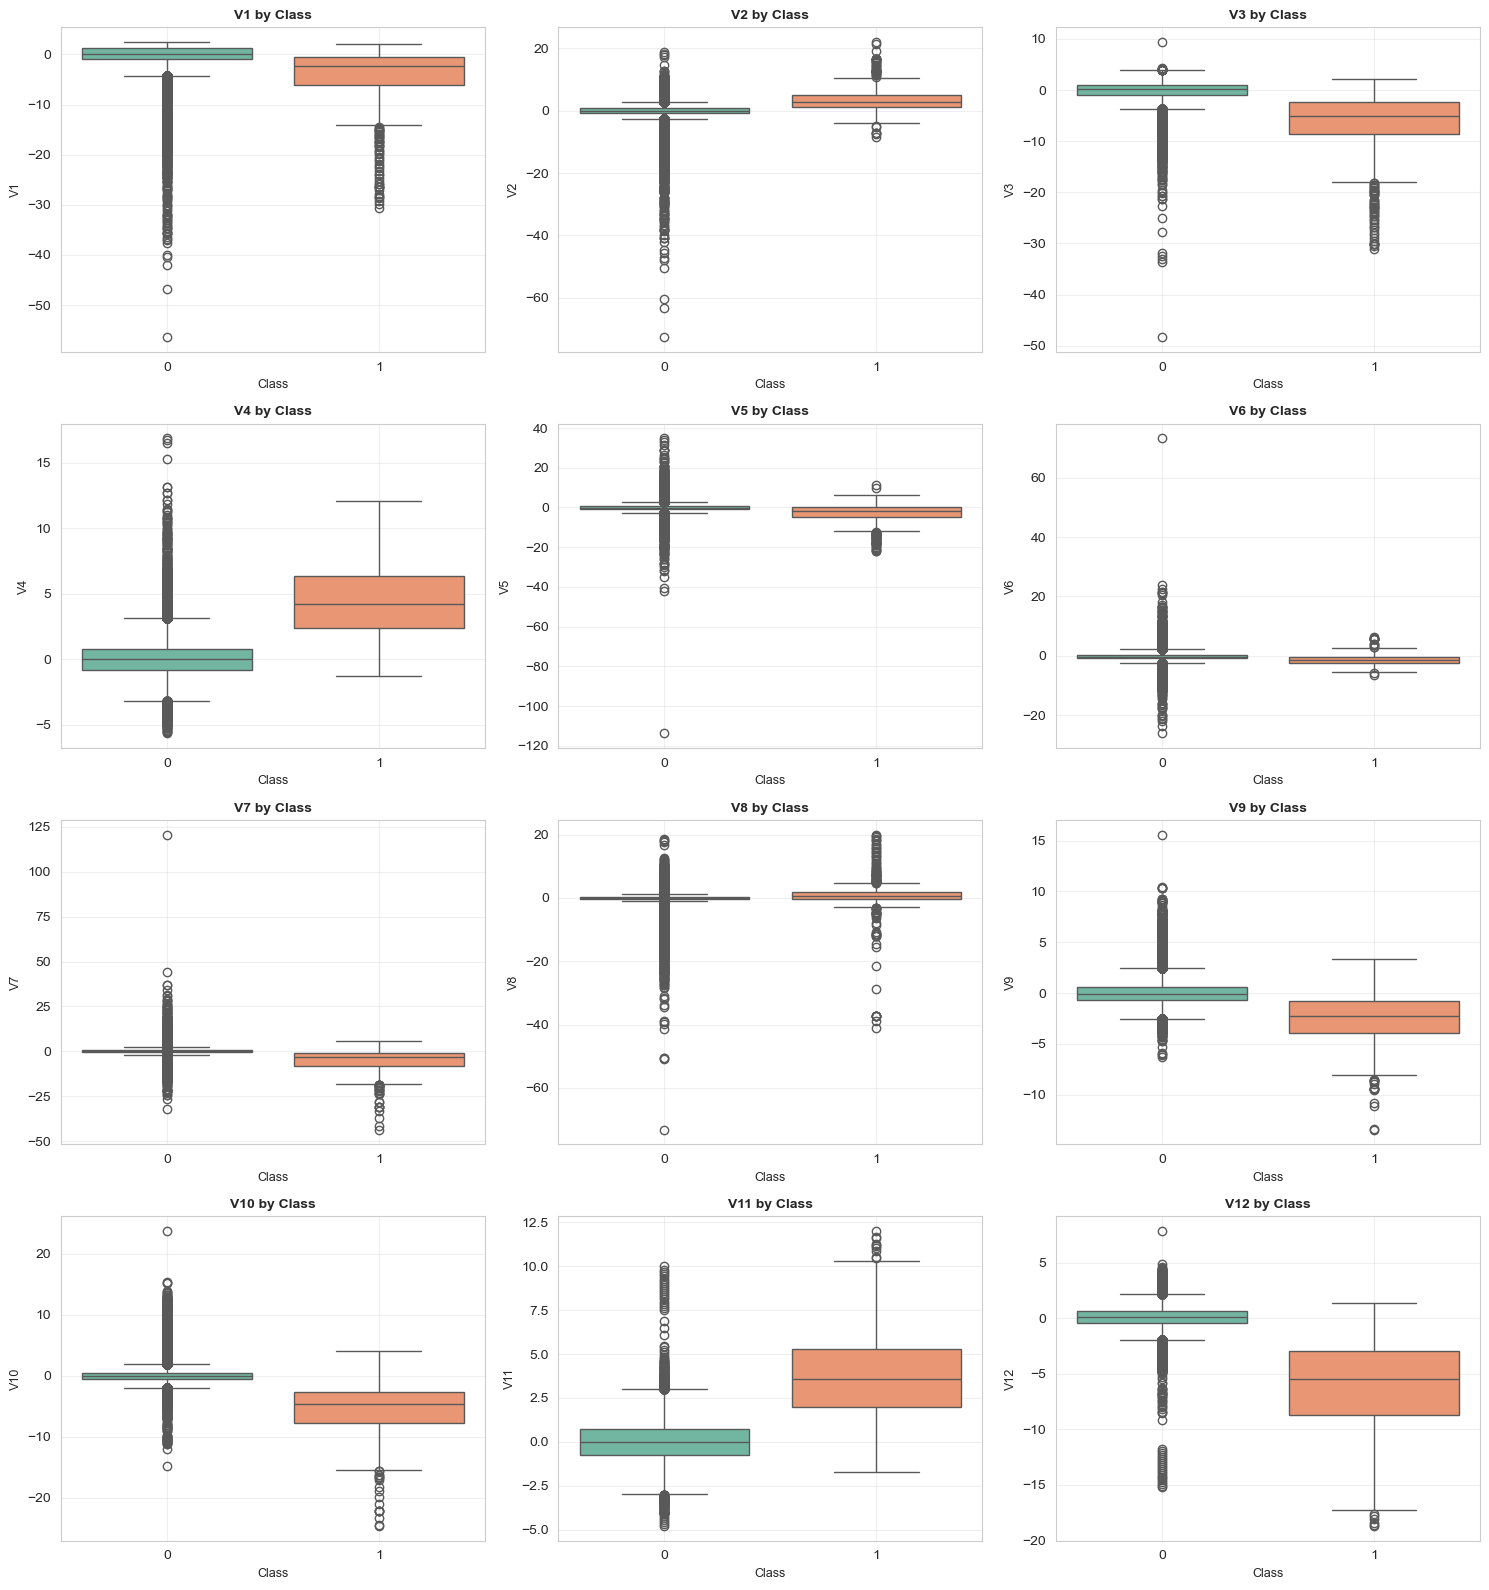

In [23]:
# Box plots for V features by class (first 12)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, col in enumerate(v_features[:12]):
    ax = axes[idx]
    
    # Box plot by class
    sns.boxplot(data=creditcard_data, x='Class', y=col, ax=ax, palette='Set2')
    ax.set_title(f'{col} by Class', fontsize=10, fontweight='bold')
    ax.set_xlabel('Class', fontsize=9)
    ax.set_ylabel(col, fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

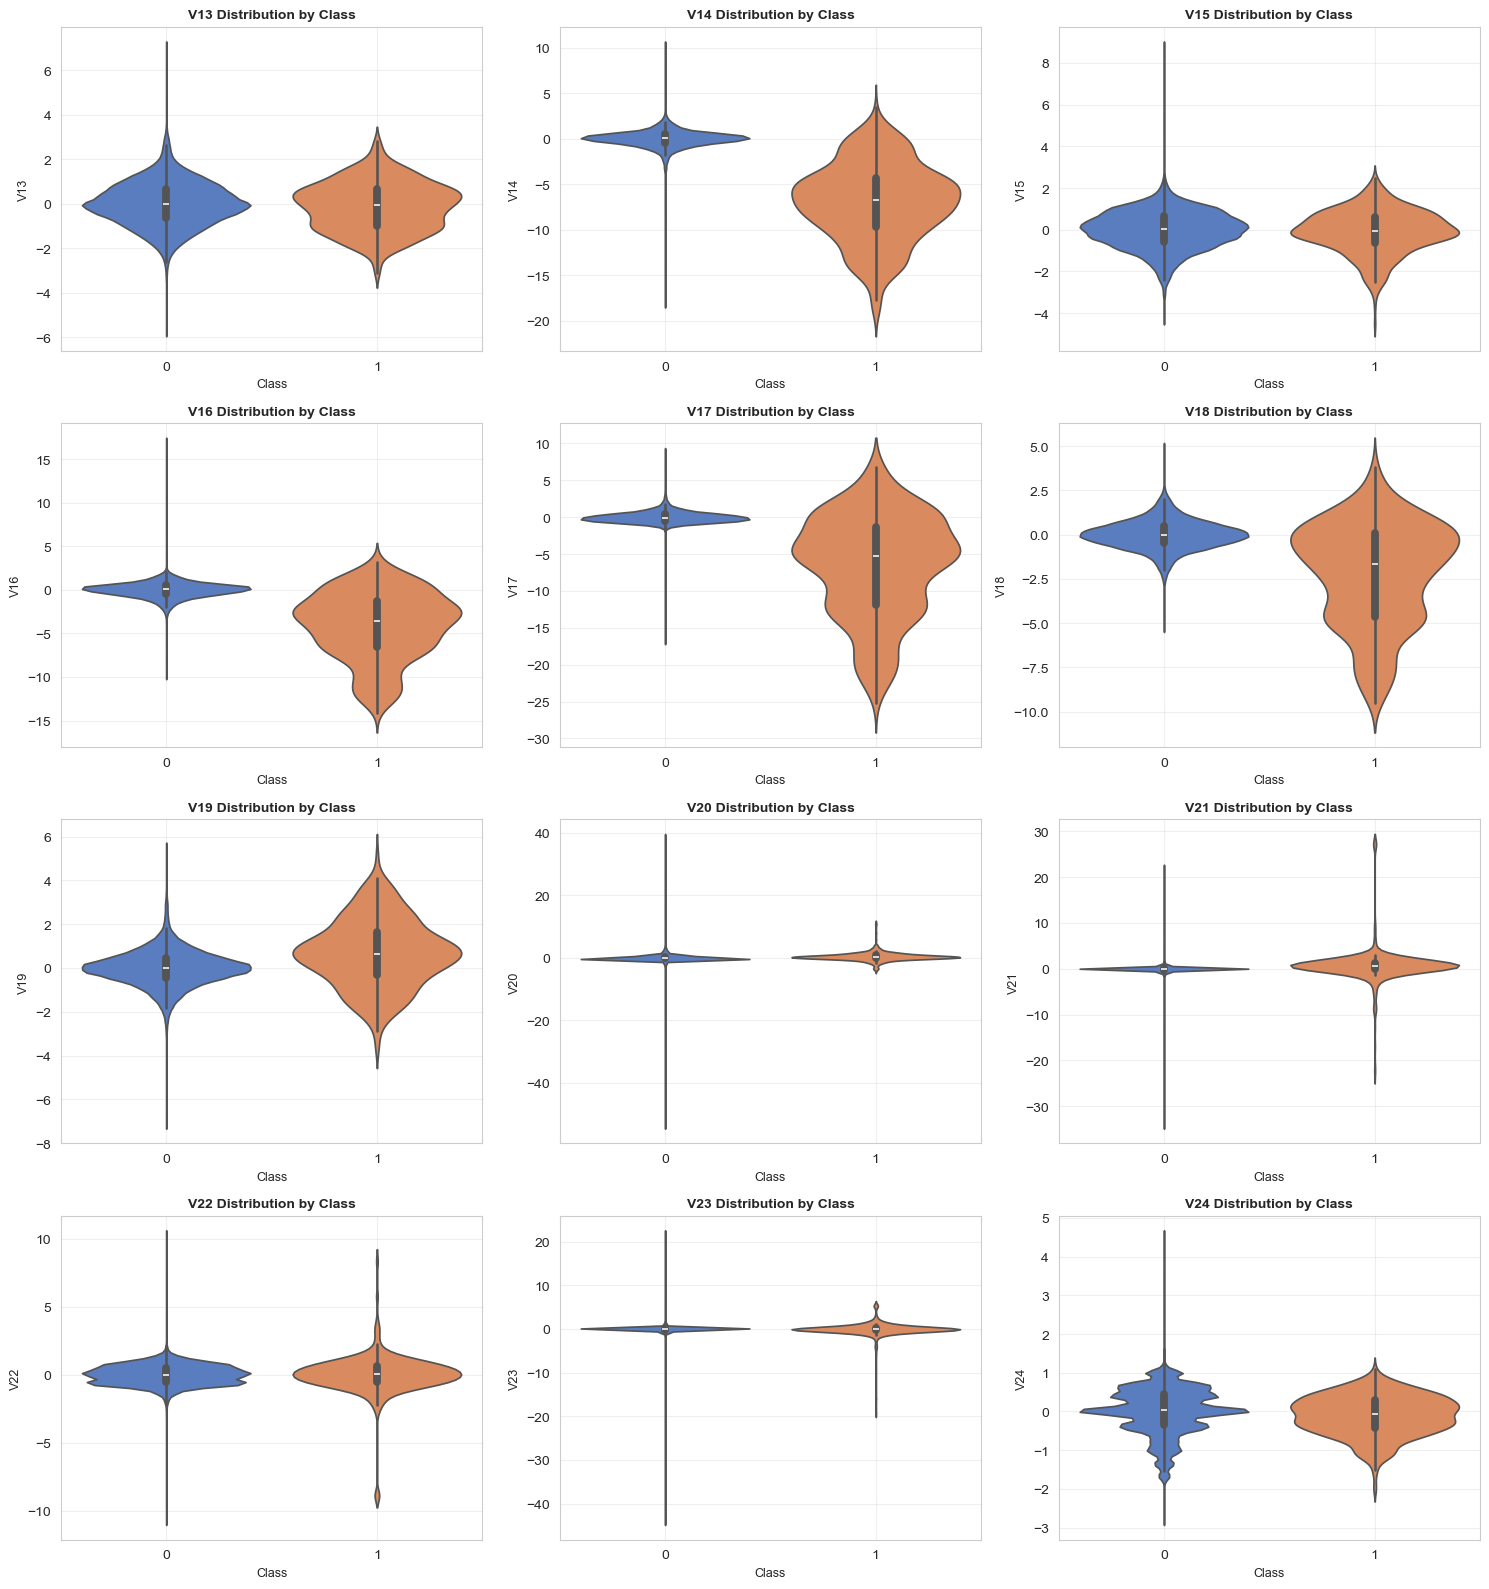

In [24]:
# Violin plots for V features by class (next 12)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, col in enumerate(v_features[12:24]):
    ax = axes[idx]
    
    # Violin plot by class
    sns.violinplot(data=creditcard_data, x='Class', y=col, ax=ax, palette='muted')
    ax.set_title(f'{col} Distribution by Class', fontsize=10, fontweight='bold')
    ax.set_xlabel('Class', fontsize=9)
    ax.set_ylabel(col, fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4 Correlation Analysis

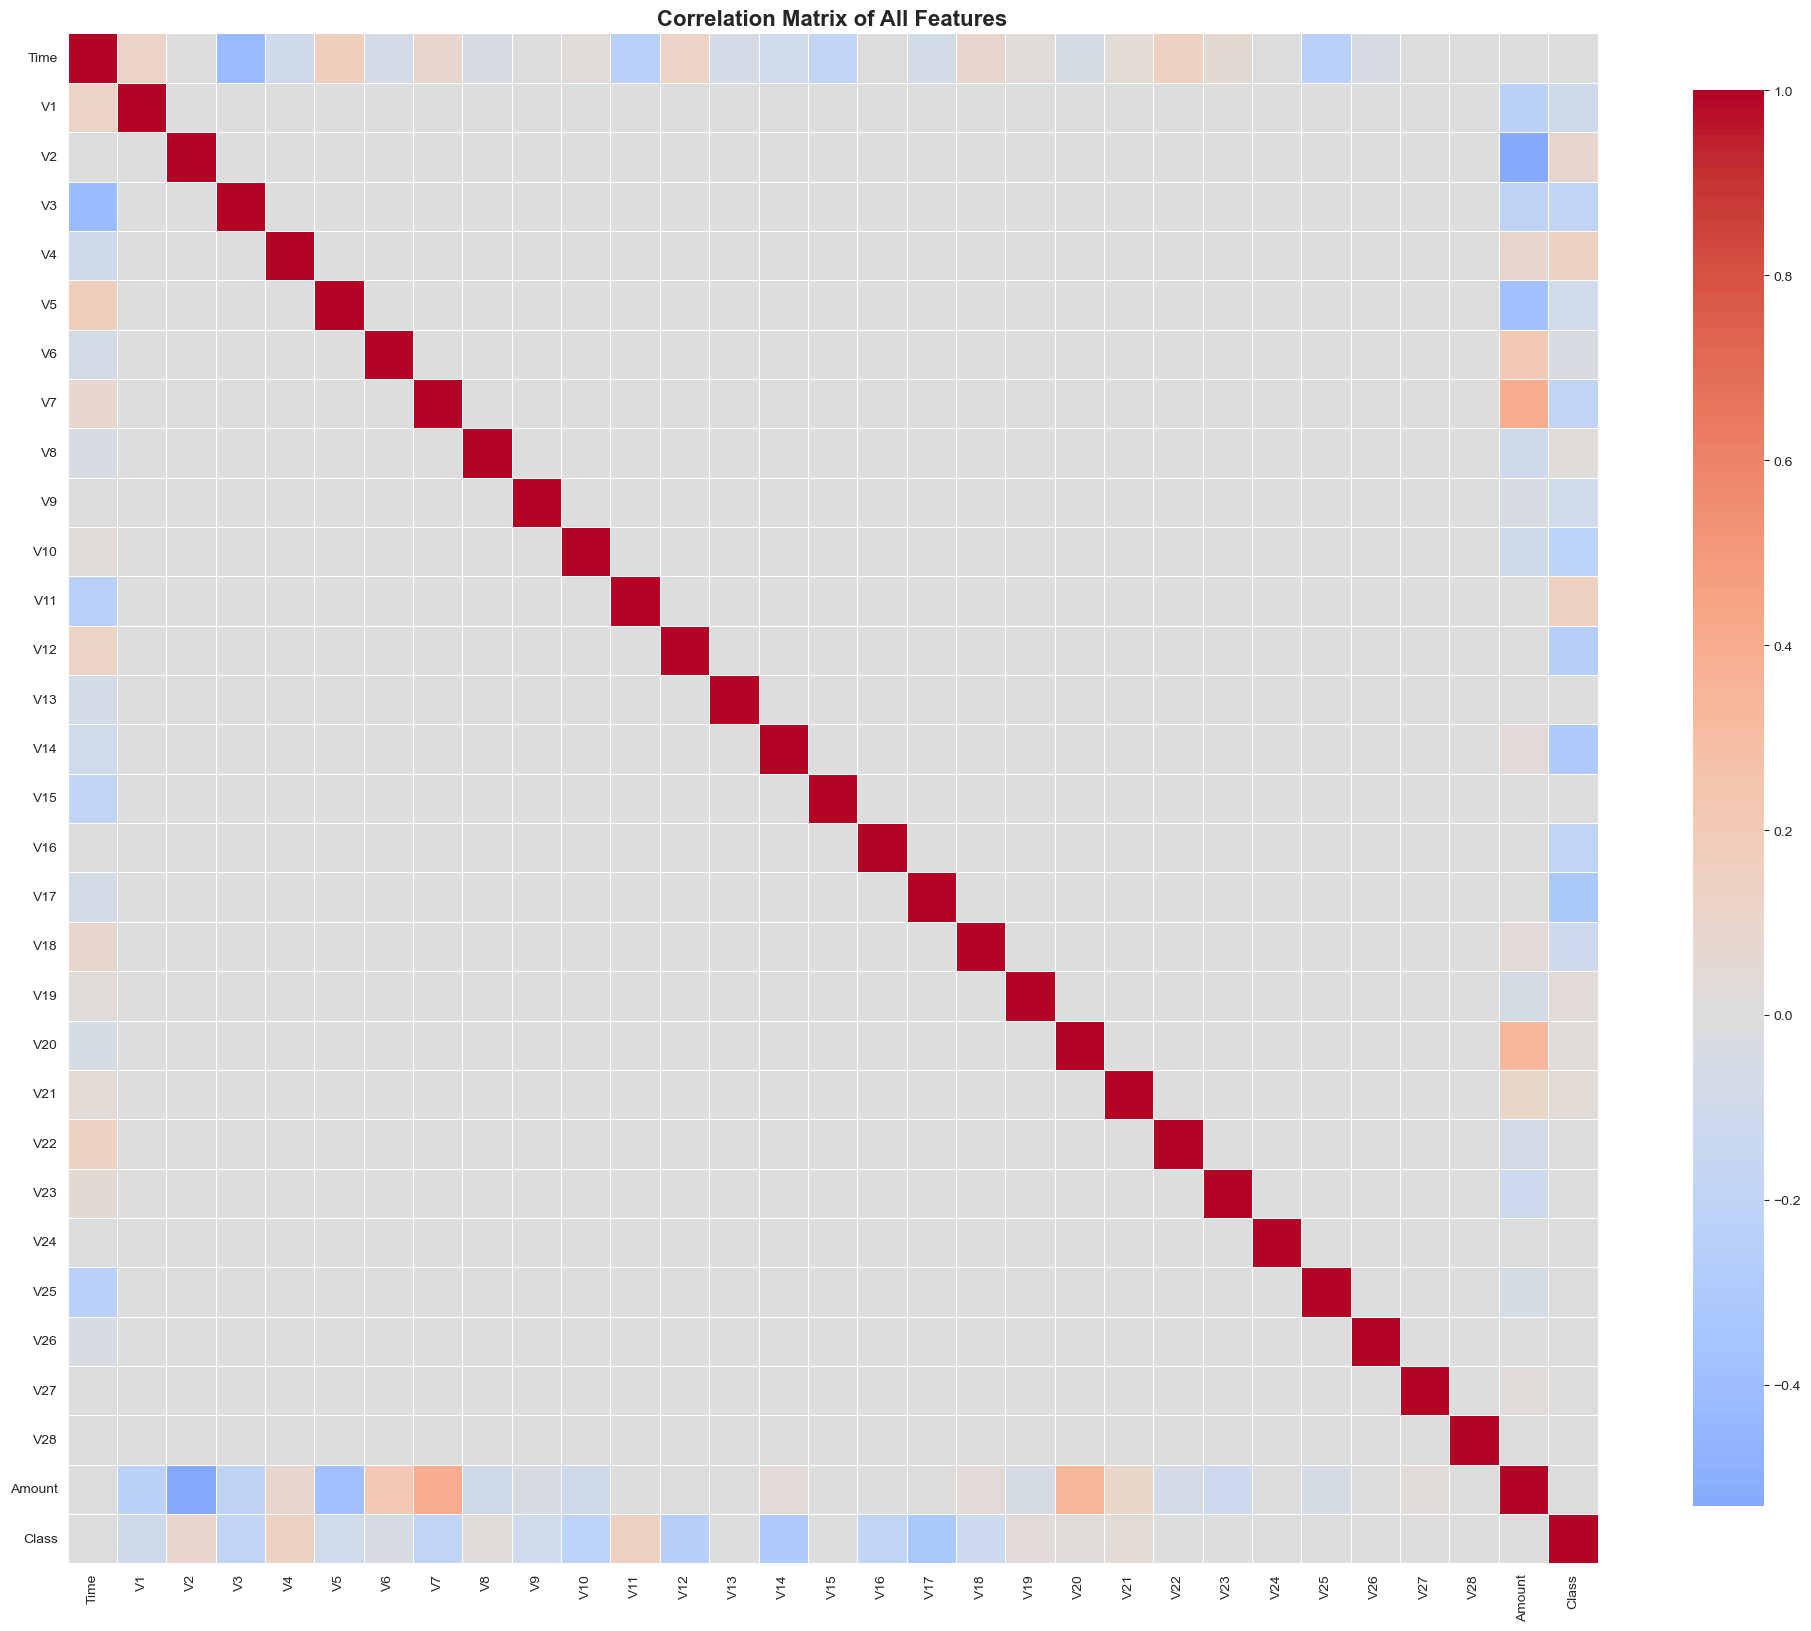

In [25]:
# Correlation matrix for all features
correlation_matrix = creditcard_data.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

CORRELATION WITH TARGET (Class)
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


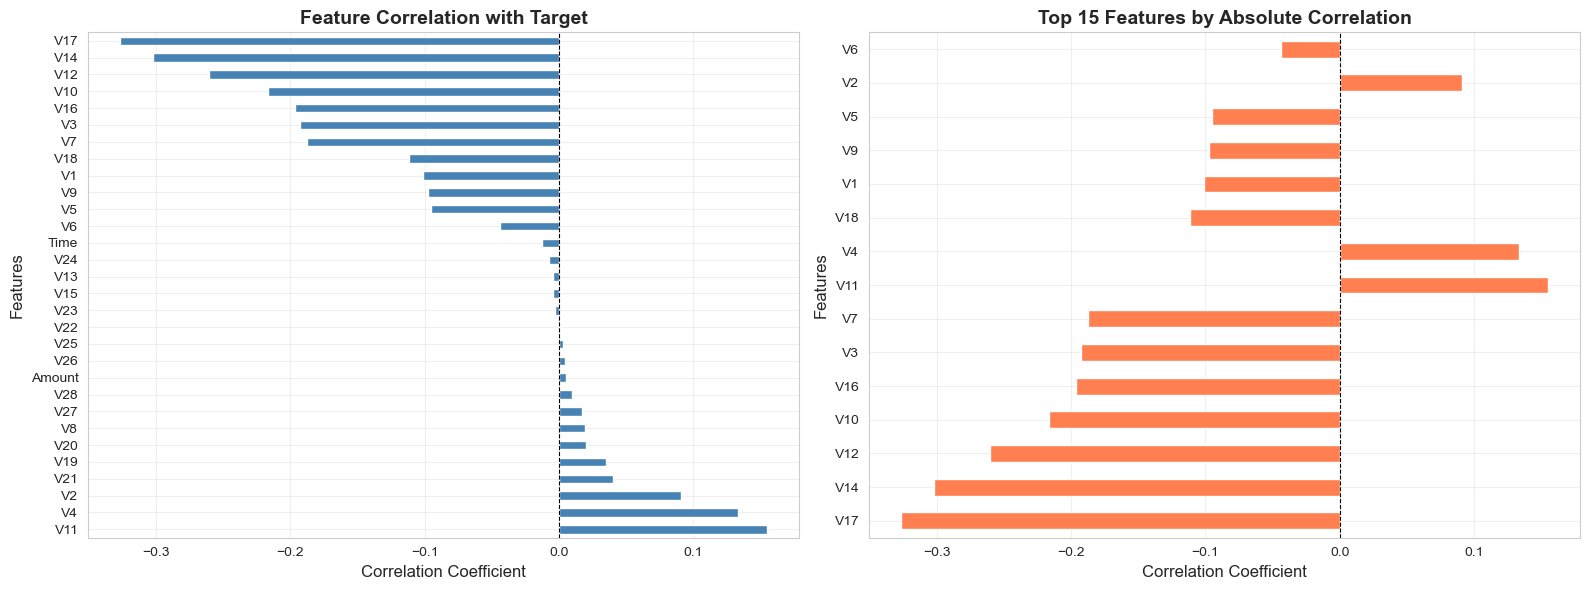

In [26]:
# Correlation with target variable
target_corr = correlation_matrix['Class'].sort_values(ascending=False)
print('='*60)
print('CORRELATION WITH TARGET (Class)')
print('='*60)
print(target_corr)

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All correlations
target_corr.drop('Class').plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Feature Correlation with Target', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_ylabel('Features', fontsize=12)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(alpha=0.3)

# Top 15 absolute correlations
top_corr = target_corr.drop('Class').abs().sort_values(ascending=False).head(15)
target_corr[top_corr.index].plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Top 15 Features by Absolute Correlation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_ylabel('Features', fontsize=12)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Outlier Detection

In [27]:
# Detect outliers using IQR method for Amount
Q1 = creditcard_data['Amount'].quantile(0.25)
Q3 = creditcard_data['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = creditcard_data[(creditcard_data['Amount'] < lower_bound) | 
                           (creditcard_data['Amount'] > upper_bound)]

print('='*60)
print('OUTLIER ANALYSIS (Amount Feature)')
print('='*60)
print(f'Q1: {Q1:.2f}')
print(f'Q3: {Q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower Bound: {lower_bound:.2f}')
print(f'Upper Bound: {upper_bound:.2f}')
print(f'\nNumber of outliers: {len(outliers):,}')
print(f'Percentage of outliers: {(len(outliers) / len(creditcard_data)) * 100:.2f}%')

OUTLIER ANALYSIS (Amount Feature)
Q1: 5.60
Q3: 77.16
IQR: 71.56
Lower Bound: -101.75
Upper Bound: 184.51

Number of outliers: 31,904
Percentage of outliers: 11.20%


## 8. Handling Class Imbalance

In [28]:
# Prepare features for SMOTE
# Use all features except Class
X = creditcard_data.drop('Class', axis=1)
y = creditcard_data['Class']

print('='*60)
print('PREPARING DATA FOR SMOTE')
print('='*60)
print(f'Original dataset shape: {X.shape}')
print(f'\nOriginal class distribution:')
print(y.value_counts())
print(f'\nClass proportions:')
print(y.value_counts(normalize=True))

PREPARING DATA FOR SMOTE
Original dataset shape: (284807, 30)

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class proportions:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [29]:
# Apply SMOTE
print('\nApplying SMOTE...')
smote = SMOTE(random_state=42, n_jobs=-1)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('\n' + '='*60)
print('AFTER SMOTE')
print('='*60)
print(f'Resampled dataset shape: {X_resampled.shape}')
print(f'\nResampled class distribution:')
print(pd.Series(y_resampled).value_counts())
print(f'\nClass proportions:')
print(pd.Series(y_resampled).value_counts(normalize=True))


Applying SMOTE...

AFTER SMOTE
Resampled dataset shape: (568630, 30)

Resampled class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Class proportions:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


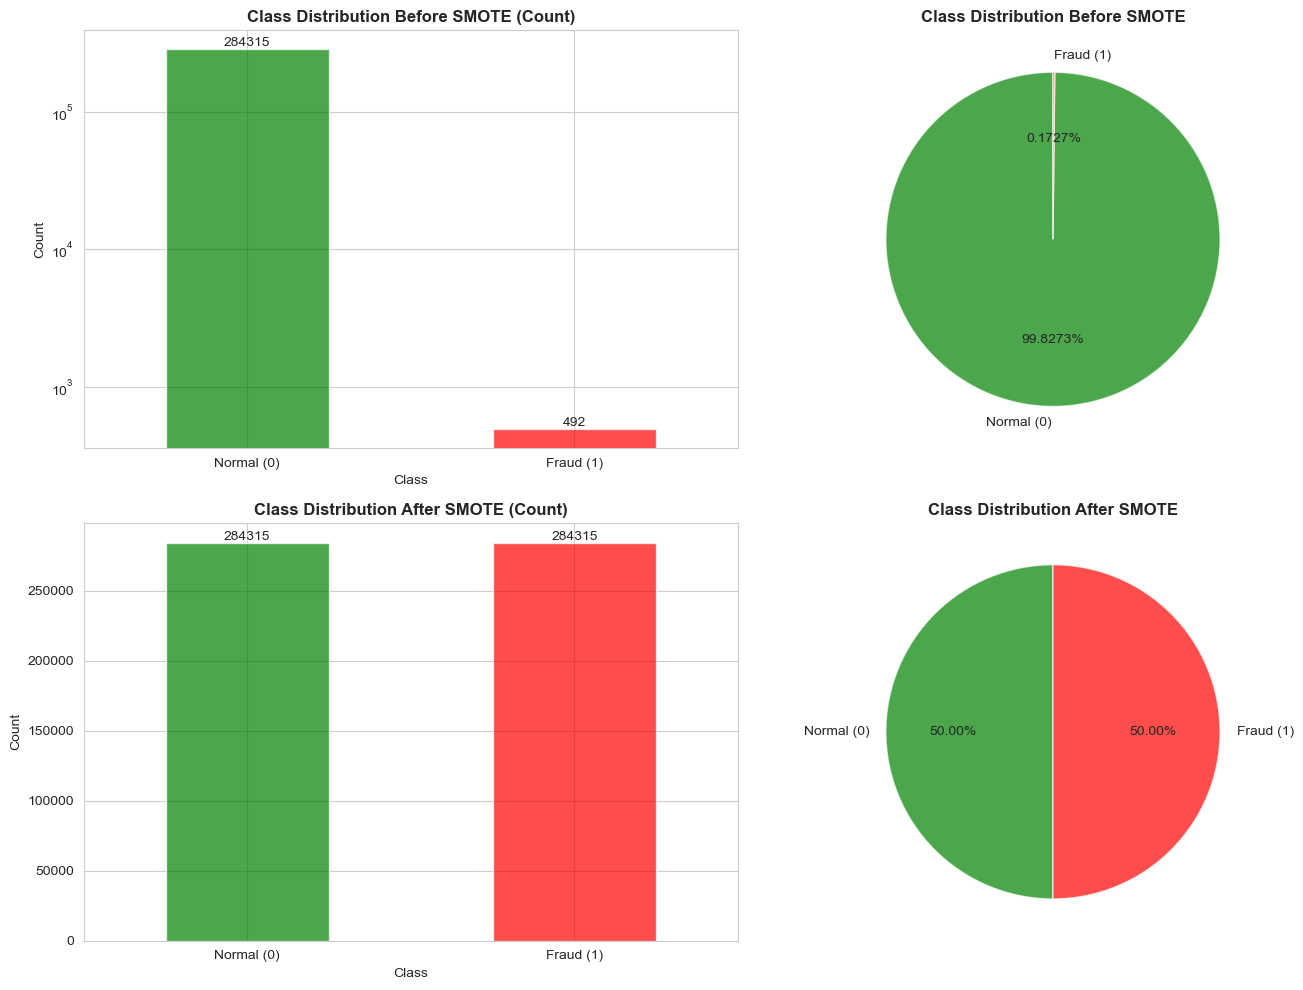

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Before SMOTE - Count
y.value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Class Distribution Before SMOTE (Count)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Class', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].set_xticklabels(['Normal (0)', 'Fraud (1)'], rotation=0)
axes[0, 0].set_yscale('log')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# Before SMOTE - Pie (use wedgeprops for alpha)
y.value_counts().plot(
    kind='pie',
    ax=axes[0, 1],
    autopct='%1.4f%%',
    labels=['Normal (0)', 'Fraud (1)'],
    colors=['green', 'red'],
    wedgeprops={'alpha': 0.7},
    startangle=90
)
axes[0, 1].set_title('Class Distribution Before SMOTE', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# After SMOTE - Count
pd.Series(y_resampled).value_counts().plot(kind='bar', ax=axes[1, 0], color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Class Distribution After SMOTE (Count)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Class', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].set_xticklabels(['Normal (0)', 'Fraud (1)'], rotation=0)
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container)

# After SMOTE - Pie
pd.Series(y_resampled).value_counts().plot(
    kind='pie',
    ax=axes[1, 1],
    autopct='%1.2f%%',
    labels=['Normal (0)', 'Fraud (1)'],
    colors=['green', 'red'],
    wedgeprops={'alpha': 0.7},
    startangle=90
)
axes[1, 1].set_title('Class Distribution After SMOTE', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


## 9. Summary and Key Findings

In [32]:
print('='*70)
print('CREDIT CARD FRAUD DATASET - EDA SUMMARY')
print('='*70)

print('\n1. DATASET OVERVIEW')
print('-' * 70)
print(f'   Total Records: {creditcard_data.shape[0]:,}')
print(f'   Total Features: {creditcard_data.shape[1]}')
print(f'   Memory Usage: {creditcard_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

print('\n2. DATA QUALITY')
print('-' * 70)
print(f'   Missing Values: {creditcard_data.isnull().sum().sum()}')
print(f'   Duplicate Records: {creditcard_data.duplicated().sum()}')
print(f'   Data Quality: ✓ Excellent (No missing values or duplicates)')

print('\n3. CLASS DISTRIBUTION')
print('-' * 70)
normal_count = (y == 0).sum()
fraud_count = (y == 1).sum()
print(f'   Normal Transactions (0): {normal_count:,} ({normal_count / len(y) * 100:.4f}%)')
print(f'   Fraud Transactions (1): {fraud_count:,} ({fraud_count / len(y) * 100:.4f}%)')
print(f'   Imbalance Ratio: {normal_count / fraud_count:.2f}:1')
print(f'   ⚠ Highly Imbalanced Dataset - SMOTE Applied')

print('\n4. FEATURE TYPES')
print('-' * 70)
print(f'   PCA Features (V1-V28): {len(v_features)}')
print(f'   Time Feature: 1')
print(f'   Amount Feature: 1')
print(f'   Target Variable (Class): 1')
print(f'   Total: {creditcard_data.shape[1]} features')

print('\n5. KEY STATISTICS')
print('-' * 70)
print(f'   Time Range: {creditcard_data["Time"].min():.0f} - {creditcard_data["Time"].max():.0f} seconds')
print(f'   Amount Range: ${creditcard_data["Amount"].min():.2f} - ${creditcard_data["Amount"].max():.2f}')
print(f'   Mean Amount: ${creditcard_data["Amount"].mean():.2f}')
print(f'   Median Amount: ${creditcard_data["Amount"].median():.2f}')

print('\n6. AFTER SMOTE RESAMPLING')
print('-' * 70)
print(f'   Total Records: {X_resampled.shape[0]:,}')
print(f'   Normal Transactions: {(y_resampled == 0).sum():,} (50.00%)')
print(f'   Fraud Transactions: {(y_resampled == 1).sum():,} (50.00%)')
print(f'   ✓ Balanced Dataset Ready for Modeling')

print('\n7. TOP CORRELATED FEATURES WITH TARGET')
print('-' * 70)
top_5_corr = target_corr.drop('Class').abs().sort_values(ascending=False).head(5)
for idx, (feature, corr_val) in enumerate(target_corr[top_5_corr.index].items(), 1):
    print(f'   {idx}. {feature}: {corr_val:.4f}')

print('\n' + '='*70)
print('EDA COMPLETE - Dataset Ready for Feature Engineering and Modeling')
print('='*70)

CREDIT CARD FRAUD DATASET - EDA SUMMARY

1. DATASET OVERVIEW
----------------------------------------------------------------------
   Total Records: 284,807
   Total Features: 31
   Memory Usage: 67.36 MB

2. DATA QUALITY
----------------------------------------------------------------------
   Missing Values: 0
   Duplicate Records: 1081
   Data Quality: ✓ Excellent (No missing values or duplicates)

3. CLASS DISTRIBUTION
----------------------------------------------------------------------
   Normal Transactions (0): 284,315 (99.8273%)
   Fraud Transactions (1): 492 (0.1727%)
   Imbalance Ratio: 577.88:1
   ⚠ Highly Imbalanced Dataset - SMOTE Applied

4. FEATURE TYPES
----------------------------------------------------------------------
   PCA Features (V1-V28): 28
   Time Feature: 1
   Amount Feature: 1
   Target Variable (Class): 1
   Total: 31 features

5. KEY STATISTICS
----------------------------------------------------------------------
   Time Range: 0 - 172792 seconds
   